In [47]:
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
    return np.sin(x) + np.cos(3*x)
#     return -x**2 + 5*x + 10
    
def simple_hill_climbing(start_x, step=0.1, max_iter=100):
    x = start_x
    path = [x]
        
    for _ in range(max_iter):
        current = f(x)
        left = f(x-step)
        right = f(x+step)
        if left>current:
            x -= step
        elif right > current:
            x += step
        else:
            break
        path.append(x)
    return x, f(x), path
start = -5
best_x, best_fx, path=simple_hill_climbing(start)
print(f"simple HC -> Best x: {best_x:.2f}")

simple HC -> Best x: -4.20


In [48]:
def steepest_ascent_hill_climbing(start_x, step=0.1, neighbors=10, max_iter=1000):
    x = start_x
    path = [x]
    
    for _ in range(max_iter):
        neighbor_points = [x+step*(i-neighbors//2) for i in range(neighbors)]
        scores = [f(p) for p in neighbor_points]
        best_neighbor = neighbor_points[np.argmax(scores)]
        if f(best_neighbor) > f(x):
            x = best_neighbor
            path.append(x)
        else:
            break
    return x, f(x), path

start = -5
best_x2, best_fx2, path2 = steepest_ascent_hill_climbing(start)
print(f"steepest HC -> Best x : {best_x2: .2f}, f(x): {best_fx2: .2f}")



steepest HC -> Best x : -4.20, f(x):  1.87


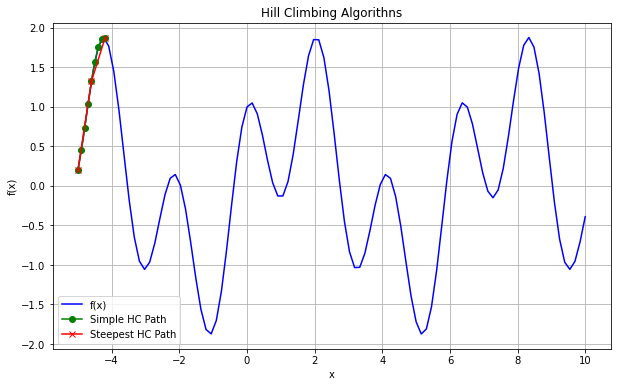

In [49]:
x_vals = np.linspace(-5, 10, 100)
y_vals = f(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color='blue')
plt.plot(path, [f(x) for x in path], marker='o', color='green', label="Simple HC Path")
plt.plot(path2, [f(x) for x in path2], marker='x', color='red', label="Steepest HC Path")
plt.title("Hill Climbing Algorithns")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()